In [1]:
from utils import *
import glob
from scipy.stats import spearmanr, pearsonr
from matplotlib import pyplot as plt
from scipy.cluster import hierarchy
from scipy.spatial.distance import squareform

/opt/conda/envs/Base/lib/python3.9/site-packages/sktime/utils/validation/series.py:21: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  VALID_INDEX_TYPES = (pd.Int64Index, pd.RangeIndex, pd.PeriodIndex, pd.DatetimeIndex)


In [2]:
pdf = get_problem_algorithm_performance('prediction_errors/mape.csv')

get_problem_algorithm_performance took=0:00:02.126131 shape=(100000, 61)


In [33]:
len(pdf.columns)

61

In [4]:
corr = pdf.corr().to_numpy()

In [5]:
#corr = spearmanr(Y).correlation
corr = (corr + corr.T) / 2
np.fill_diagonal(corr, 1)

In [6]:
corr

array([[1.        , 0.9132797 , 0.90870252, ..., 0.71405414, 0.86165951,
        0.90358664],
       [0.9132797 , 1.        , 0.94739551, ..., 0.72565802, 0.85967562,
        0.91146981],
       [0.90870252, 0.94739551, 1.        , ..., 0.72873429, 0.8628308 ,
        0.91338296],
       ...,
       [0.71405414, 0.72565802, 0.72873429, ..., 1.        , 0.67114285,
        0.70402186],
       [0.86165951, 0.85967562, 0.8628308 , ..., 0.67114285, 1.        ,
        0.84413075],
       [0.90358664, 0.91146981, 0.91338296, ..., 0.70402186, 0.84413075,
        1.        ]])

In [7]:
figures_directory = 'figures'
create_directory_if_not_exist(figures_directory)

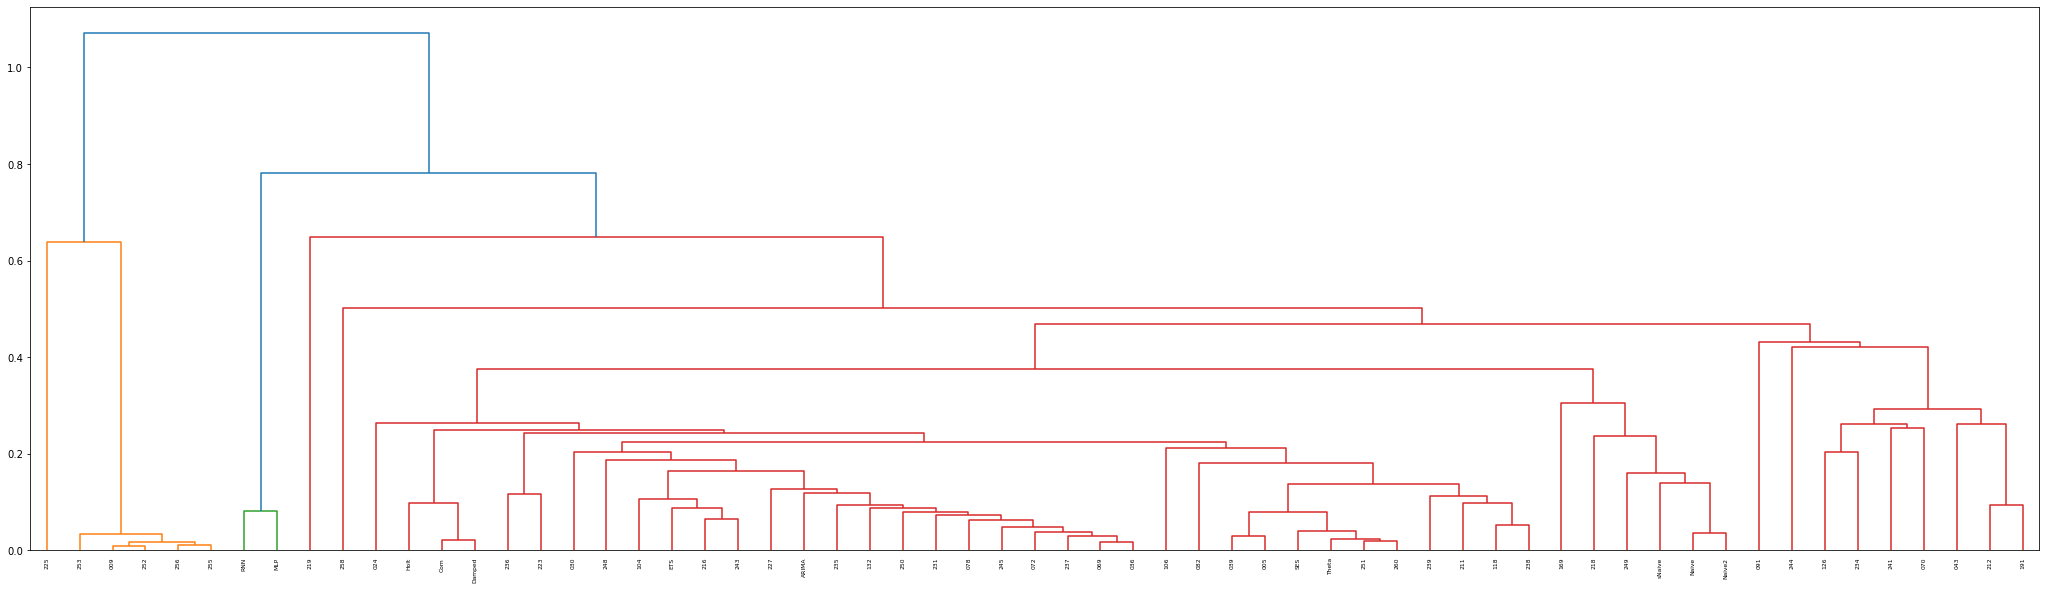

In [8]:
fig, ax1 = plt.subplots(1, 1, figsize=(36, 10))

distance_matrix = 1 - np.abs(corr)
dist_linkage = hierarchy.ward(squareform(distance_matrix))
dendro = hierarchy.dendrogram(
    dist_linkage, labels=pdf.columns, ax=ax1, leaf_rotation=90
)
dendro_idx = np.arange(0, len(dendro["ivl"]))

plt.show()
#plt.savefig(f'{figures_directory}/feature_correlation_histogram.pdf', bbox_inches='tight', pad_inches=0)

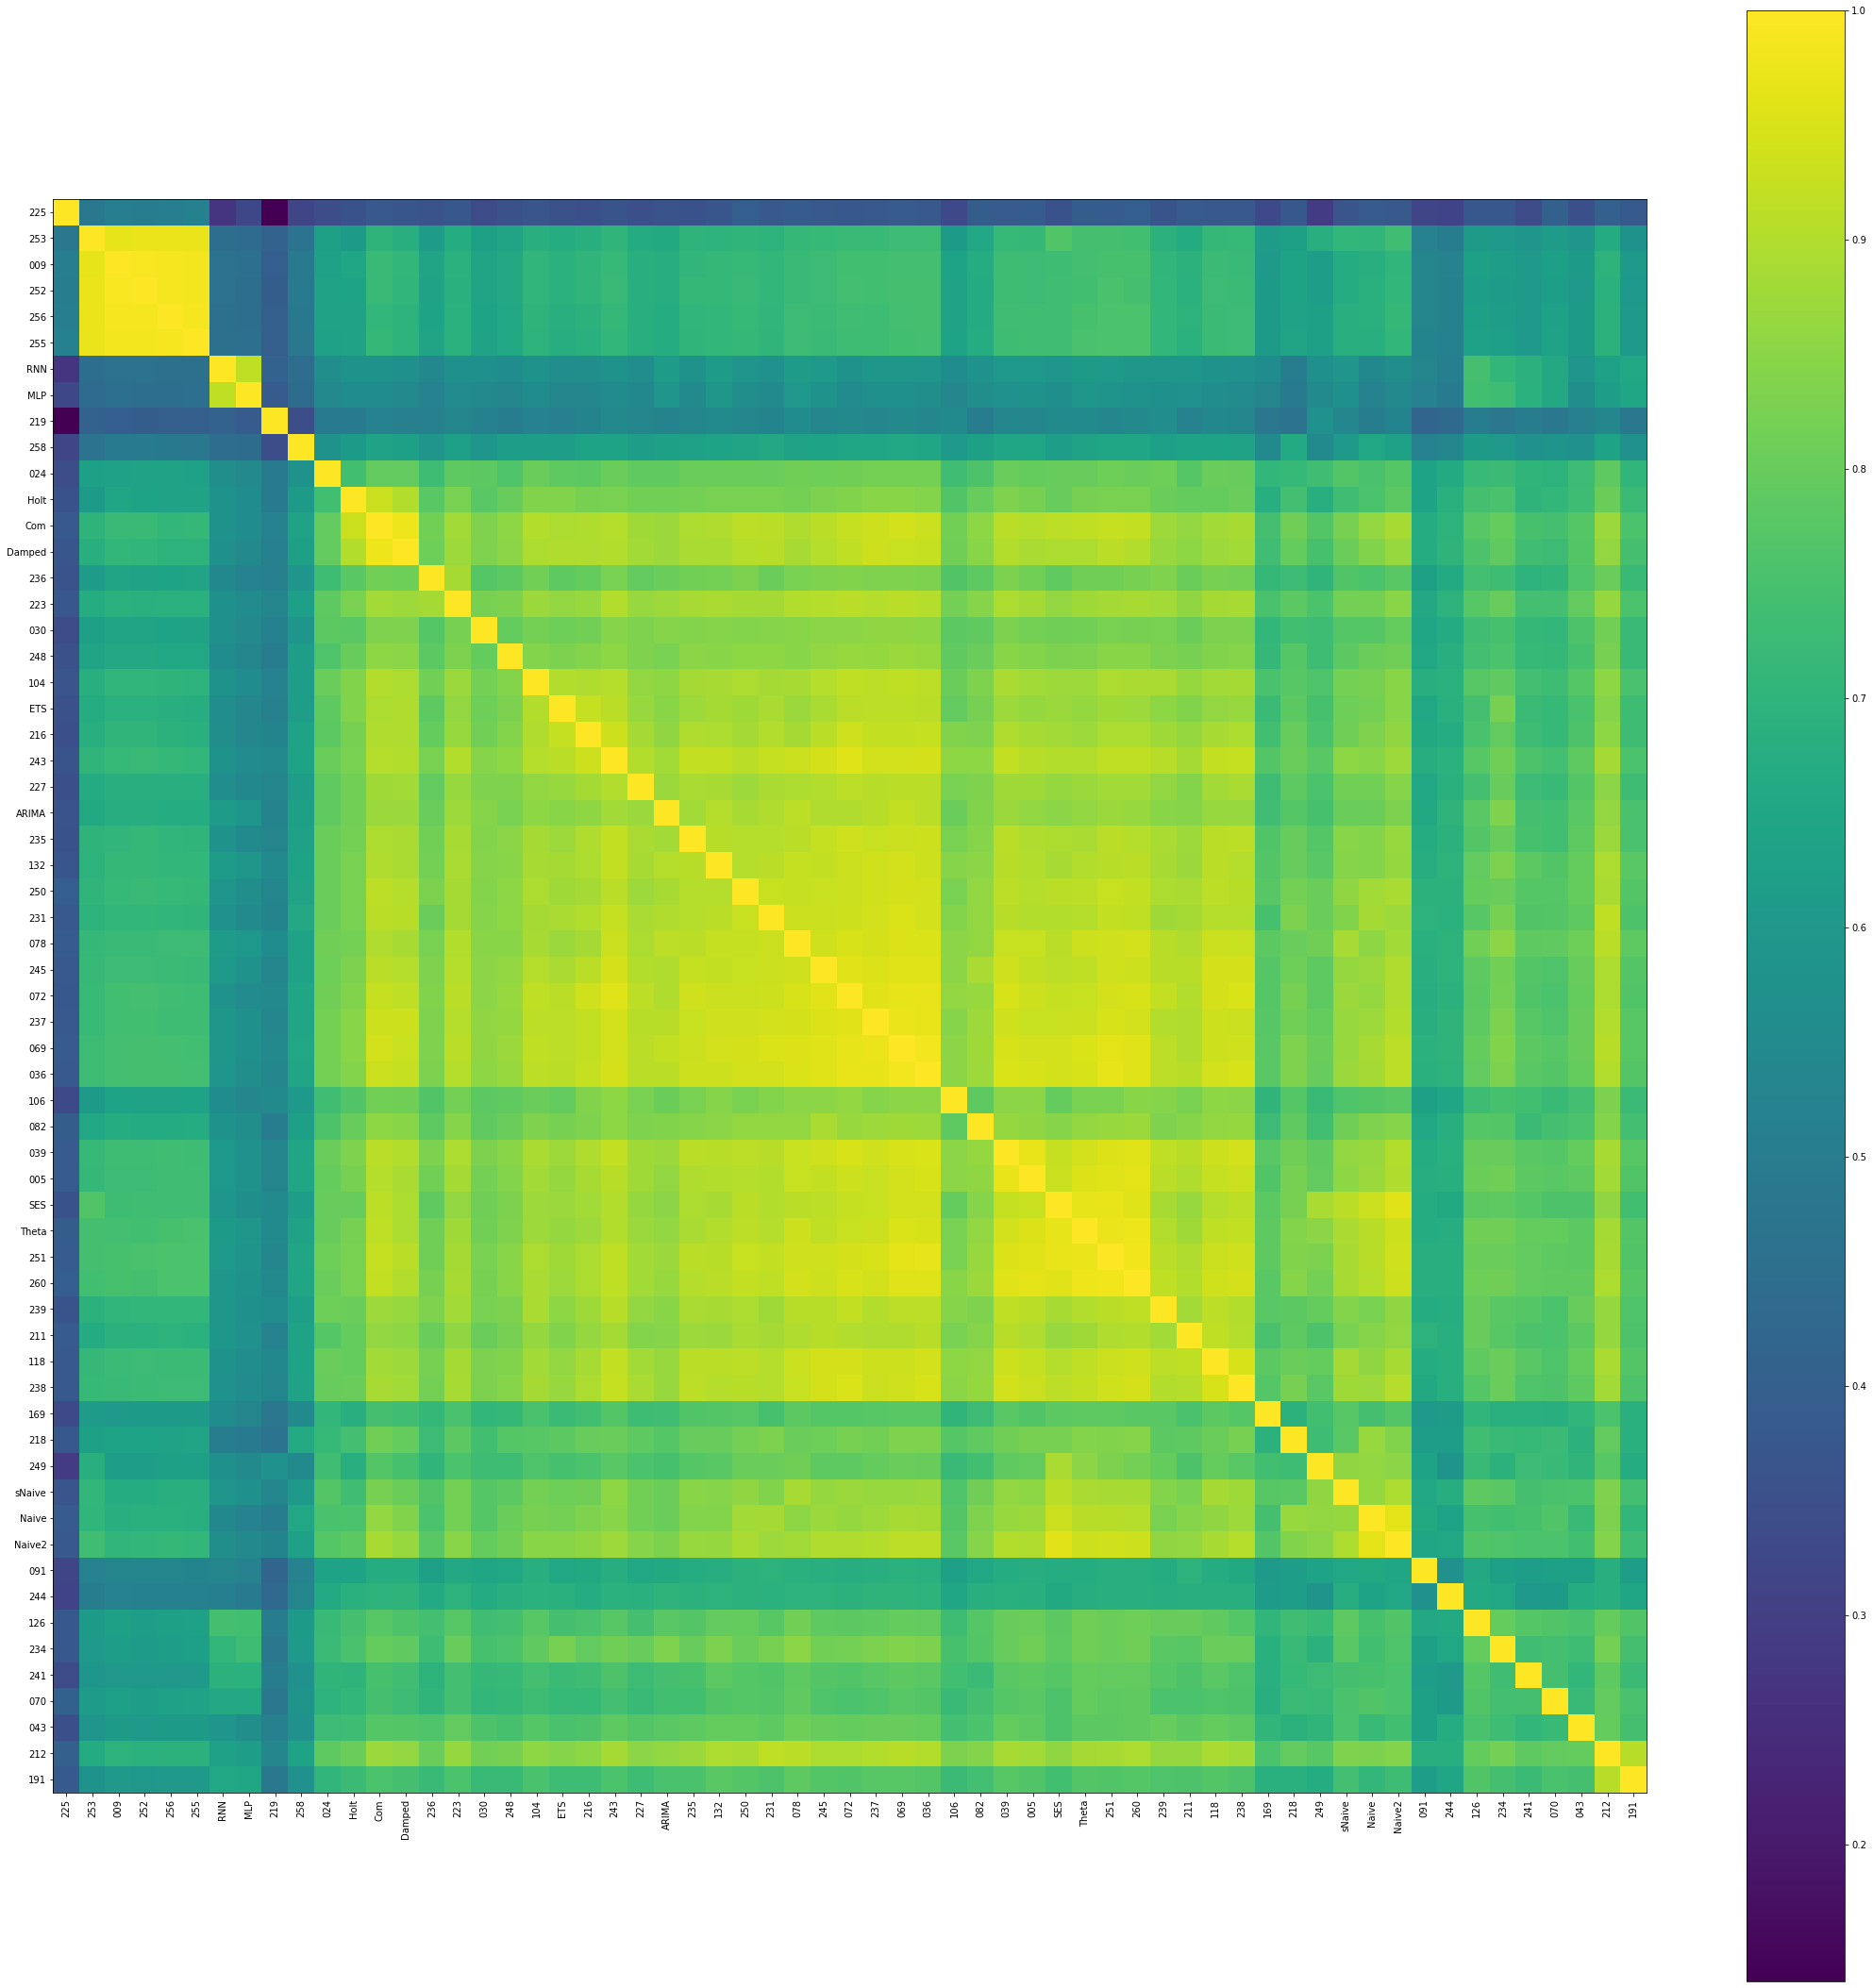

In [9]:
fig, ax1 = plt.subplots(1, 1, figsize=(30, 30))
shw = ax1.imshow(corr[dendro["leaves"], :][:, dendro["leaves"]])
ax1.set_xticks(dendro_idx)
ax1.set_yticks(dendro_idx)
ax1.set_xticklabels(dendro["ivl"], rotation="vertical")
ax1.set_yticklabels(dendro["ivl"])
fig.tight_layout()
plt.colorbar(shw)

plt.savefig(f'{figures_directory}/performance_correlation.pdf', bbox_inches='tight', pad_inches=0)

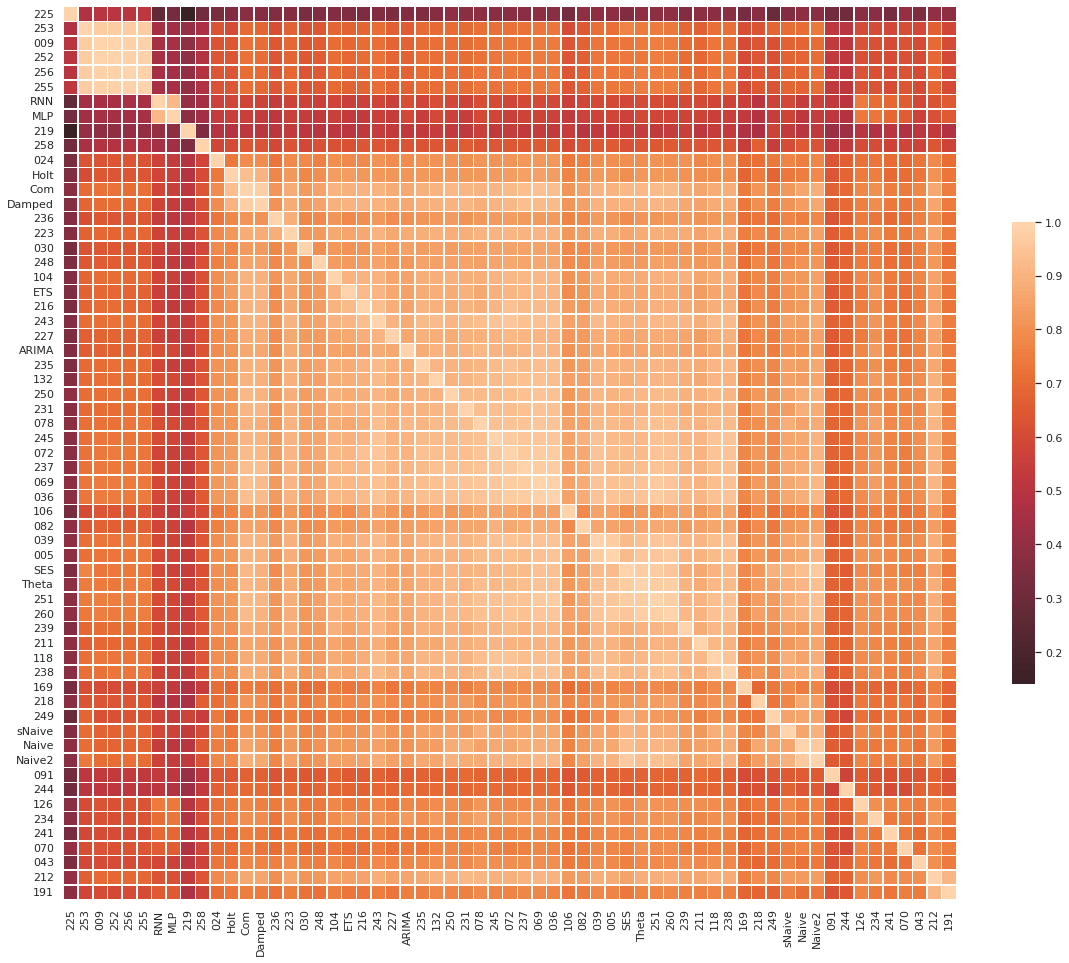

In [10]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="white")

# Generate a large random dataset
#rs = np.random.RandomState(33)
#d = pd.DataFrame(data=rs.normal(size=(100, 26)),
#                 columns=list(ascii_letters[26:]))

# Compute the correlation matrix
corr = pdf.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 17))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

corr_order = corr[dendro["ivl"]].loc[dendro["ivl"]]

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_order, center=0, xticklabels=True, yticklabels=True, #cmap=cmap,#, mask=mask
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.savefig(f'{figures_directory}/performance_correlation.pdf', bbox_inches='tight', pad_inches=0)

In [30]:
pdf_table = pdf.T

original_columns = pdf_table.columns

pdf_table['sMAPE'] = pdf_table.mean(axis=1)
pdf_table['Type'] = pdf_table.index.map(forecasting_algo_type())
pdf_table = pdf_table.drop(columns=original_columns).sort_values(by='sMAPE')
pdf_table['Type'] = pdf_table['Type'].map({'Hybrid': 'Hybr.', 'Combination': 'Comb.', 'Statistical': 'Stat.', 'Machine Learning': 'ML'})
pdf_table = pdf_table.reset_index()
print(pdf_table.to_latex(float_format="%.3f"))

\begin{tabular}{llrl}
\toprule
Problem &   index &  sMAPE &   Type \\
\midrule
0  &     118 &  0.114 &  Hybr. \\
1  &     072 &  0.117 &  Comb. \\
2  &     245 &  0.117 &  Comb. \\
3  &     069 &  0.118 &  Comb. \\
4  &     237 &  0.118 &  Comb. \\
5  &     036 &  0.119 &  Comb. \\
6  &     238 &  0.119 &  Comb. \\
7  &     260 &  0.120 &  Stat. \\
8  &     078 &  0.120 &  Comb. \\
9  &     039 &  0.121 &  Comb. \\
10 &     243 &  0.121 &  Comb. \\
11 &     005 &  0.121 &  Stat. \\
12 &     132 &  0.122 &  Comb. \\
13 &     251 &  0.122 &  Stat. \\
14 &     235 &  0.123 &  Stat. \\
15 &   Theta &  0.123 &  Stat. \\
16 &     223 &  0.124 &  Comb. \\
17 &     227 &  0.125 &  Comb. \\
18 &     250 &  0.125 &  Comb. \\
19 &     239 &  0.125 &  Comb. \\
20 &     104 &  0.126 &  Comb. \\
21 &     231 &  0.126 &  Comb. \\
22 &     Com &  0.126 &  Comb. \\
23 &     216 &  0.127 &  Comb. \\
24 &  Damped &  0.127 &  Stat. \\
25 &   ARIMA &  0.127 &  Stat. \\
26 &     ETS &  0.127 &  Stat. \\
27 

/tmp/ipykernel_9607/365055491.py:10: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(pdf_table.to_latex(float_format="%.3f"))
